#### **Project Title:**  ***" Air Pollution Forecasting "***
##### **Dataset:** *"Air Quality Dataset"*

In [ ]:
#Loading Important Libraries.
#For working with dataframes and handling data.
import pandas as pd
#For numerical operations and missing value handling.
import numpy as np
#For creating plots and visualizations.
import matplotlib.pyplot as plt
#For advanced and aesthetic data visualizations.
import seaborn as sns
#For statistical operations like z-score calculation.
from scipy import stats
#For normalizing the data to a specific range (e.g., 0 to 1).
from sklearn.preprocessing import MinMaxScaler
#For creating a sequential model.
from tensorflow.keras.models import Sequential
#For recurrent layers, Dense for fully connected layers.
from tensorflow.keras.layers import LSTM, Dense
#For time-series forecasting with the ARIMA model.
from statsmodels.tsa.arima.model import ARIMA
#For evaluating model performance.
from sklearn.metrics import mean_squared_error , mean_absolute_error

##### **Step 01:** Data Handling

Air Quality Dataset:
                      CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
DateTime                                                                       
2004-03-10 18:00:00     2.6      1360.00       150  11.881723        1045.50   
2004-03-10 19:00:00     2.0      1292.25       112   9.397165         954.75   
2004-03-10 20:00:00     2.2      1402.00        88   8.997817         939.25   
2004-03-10 21:00:00     2.2      1375.50        80   9.228796         948.25   
2004-03-10 22:00:00     1.6      1272.25        51   6.518224         835.50   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
DateTime                                                            
2004-03-10 18:00:00    166.0       1056.25    113.0       1692.00   
2004-03-10 19:00:00    103.0       1173.75     92.0       1558.75   
2004-03-10 20:00:00    131.0       1140.00    114.0       1554.50   
2004-03-10 21:00:00    172.0       1092.00    122.0       1583.75   
200

<ipython-input-33-c4af43ad3039>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


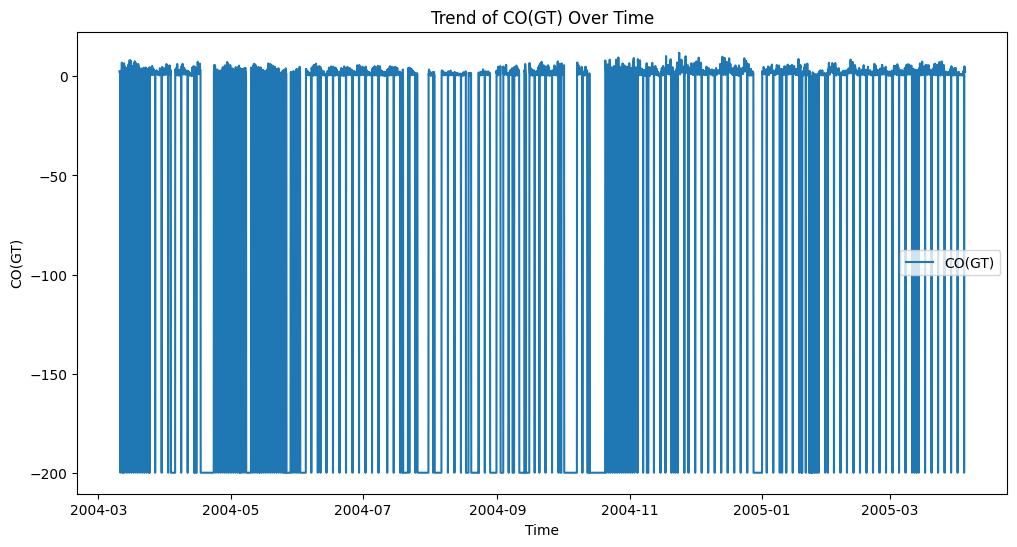

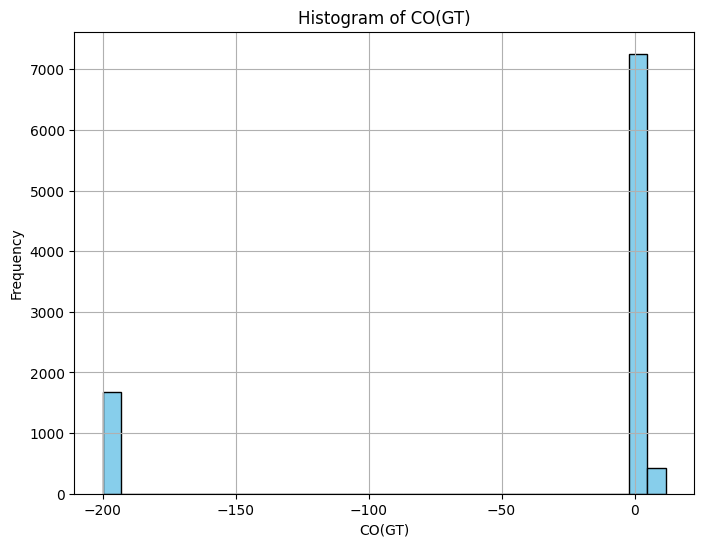

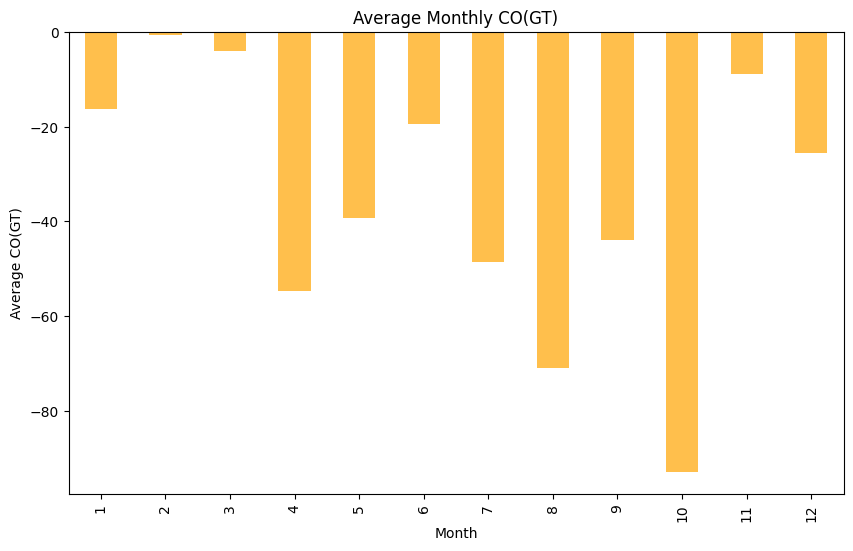

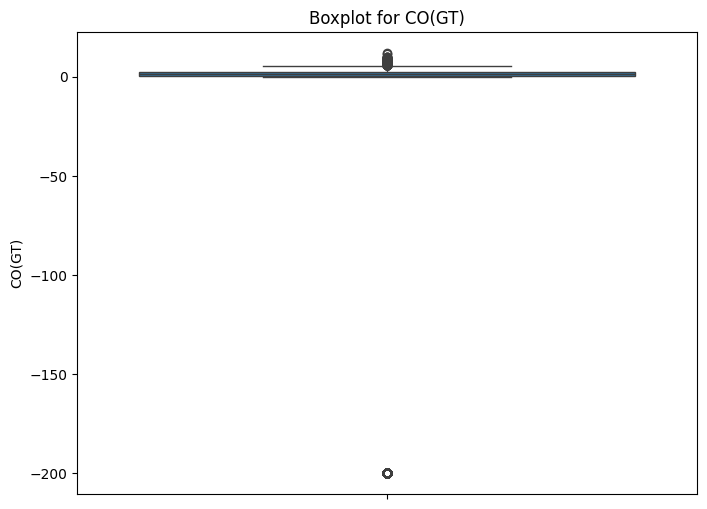


Anomalies Detected: 
 Empty DataFrame
Columns: [CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH, Month]
Index: []


In [ ]:
#Loading the Air_Quality dataset.
df = pd.read_excel("air_quality_dataset.xlsx")
#Converting Date and Time to String(if necessary).
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
#Parsing Date and Time Columns.
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)
#Dropping Original Date and Time Columns.
df.drop(['Date', 'Time'], axis=1, inplace=True)
#Displaying the Air_Quality dataset.
print("Air Quality Dataset:\n",df.head())
#Handling missing values.
print("Missing Values Per Column Before Handling: \n",df.isnull().sum())
#Forward filling for missing values.
df.fillna(method='ffill', inplace=True)
#Interpolation for missing values.
df.interpolate(method='linear', inplace=True)
print("Missing Values Per Column After Handling: \n",df.isnull().sum())
#Exploratory Data Analysis(EDA).
#Summary Statistics of Air_Quality dataset.
print("Summary Statistics: ",df.describe())
#Visualizing trends(Line plot for CO(GT)).
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['CO(GT)'], label='CO(GT)')
plt.title('Trend of CO(GT) Over Time')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()
#Histogram for data distribution.
plt.figure(figsize=(8, 6))
df['CO(GT)'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CO(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.show()
#Seasonality analysis.
df['Month'] = df.index.month
monthly_avg = df.groupby('Month').mean()
#Plotting monthly averages.
plt.figure(figsize=(10, 6))
monthly_avg['CO(GT)'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Monthly CO(GT)')
plt.xlabel('Month')
plt.ylabel('Average CO(GT)')
plt.show()
#Detecting anomalies using Boxplot.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['CO(GT)'])
plt.title('Boxplot for CO(GT)')
plt.show()
#Detecting anomalies using Z-Score.
z_scores = np.abs(stats.zscore(df['CO(GT)'].dropna()))
print("\nAnomalies Detected: \n",df[z_scores > 3])

##### **Step 02:** Feature Engineering

In [ ]:
#Extracting hour, day and month features.
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
#Displaying a few rows to verify new features.
print(df[['Hour', 'Day', 'Month']].head())
#Calculating moving averages and rolling statistics.
#Calculating a 3-hour moving average for the 'CO(GT)' column.
df['CO_Moving_Avg'] = df['CO(GT)'].rolling(window=3).mean()
#Calculating rolling standard deviation for the 'CO(GT)' column.
df['CO_Rolling_Std'] = df['CO(GT)'].rolling(window=3).std()
#Displaying a few rows to verify rolling statistics.
print(df[['CO(GT)', 'CO_Moving_Avg', 'CO_Rolling_Std']].head())
#Adding lag features for Time-Series data.
#Creating lag features for 1 hour and 2 hours for 'CO(GT)'.
df['CO_Lag_1'] = df['CO(GT)'].shift(1)
df['CO_Lag_2'] = df['CO(GT)'].shift(2)
#Displaying a few rows to verify lag features.
print(df[['CO(GT)', 'CO_Lag_1', 'CO_Lag_2']].head())
#Dropping NaN values introduced by rolling and lag features if needed.
df.dropna(inplace=True)

                     Hour  Day  Month
DateTime                             
2004-03-10 18:00:00    18   10      3
2004-03-10 19:00:00    19   10      3
2004-03-10 20:00:00    20   10      3
2004-03-10 21:00:00    21   10      3
2004-03-10 22:00:00    22   10      3
                     CO(GT)  CO_Moving_Avg  CO_Rolling_Std
DateTime                                                  
2004-03-10 18:00:00     2.6            NaN             NaN
2004-03-10 19:00:00     2.0            NaN             NaN
2004-03-10 20:00:00     2.2       2.266667        0.305505
2004-03-10 21:00:00     2.2       2.133333        0.115470
2004-03-10 22:00:00     1.6       2.000000        0.346410
                     CO(GT)  CO_Lag_1  CO_Lag_2
DateTime                                       
2004-03-10 18:00:00     2.6       NaN       NaN
2004-03-10 19:00:00     2.0       2.6       NaN
2004-03-10 20:00:00     2.2       2.0       2.6
2004-03-10 21:00:00     2.2       2.2       2.0
2004-03-10 22:00:00     1.6      

##### **Step 03:** Model Training

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1322
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0326
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0322
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0313
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0265
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0272
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0265
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0284
Epoch 9/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0249
Epoch 10/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0274
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RMSE for LSTM: 75.90707124598718
RMSE for ARIMA: 34.97103854687758


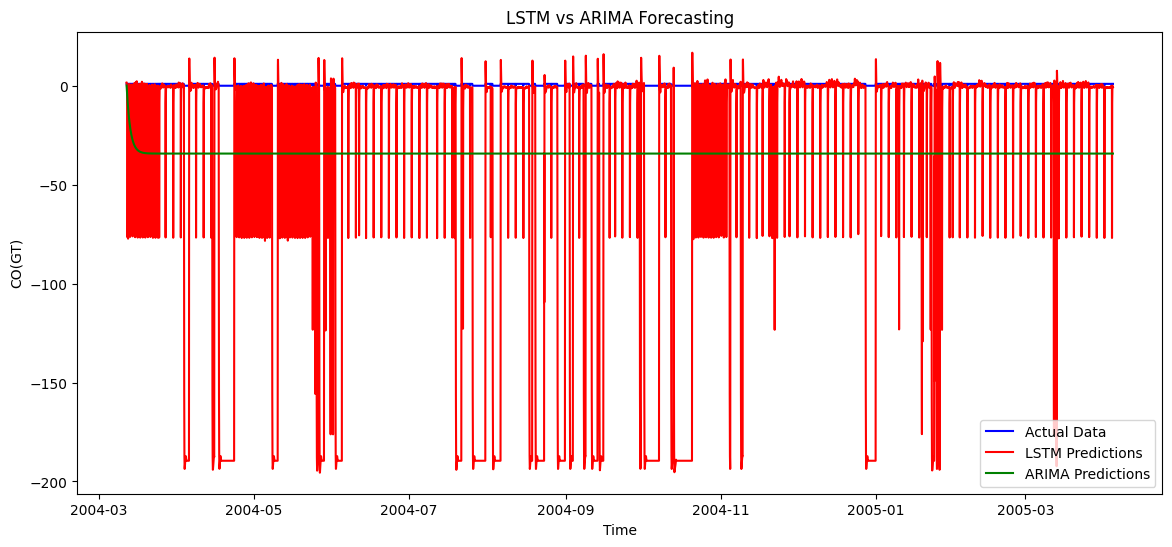

In [ ]:
#Preparing data for LSTM.
#Using 'CO(GT)' as the target variable for forecasting.
data = df[['CO(GT)']]
#Scaling the data using MinMaxScaler for LSTM model.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
#Creating sequences for LSTM (X: input features, y: target values).
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
#Using 24 hours as input to predict the next hour (can adjust seq_length for more/less data).
seq_length = 24
X, y = create_sequences(scaled_data, seq_length)
#Reshaping X for LSTM: [samples, time steps, features].
X = X.reshape(X.shape[0], X.shape[1], 1)
#Training LSTM Model.
#Building LSTM Model.
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
#Training the model (epochs can be adjusted based on performance).
model.fit(X, y, epochs=10, batch_size=32, verbose=1)
#Making predictions using LSTM.
predictions_lstm = model.predict(X)
#Inversing transform to get the data back in original scale.
predictions_lstm = scaler.inverse_transform(predictions_lstm)
#Training ARIMA Model.
#Using the last 'seq_length' data points to train the ARIMA model.
train_data = data['CO(GT)'][-len(X):]
#Training ARIMA model (using ARIMA(1, 0, 1) as an example).
arima_model = ARIMA(train_data, order=(1, 0, 1))  # You can adjust the order (p, d, q)
arima_model_fit = arima_model.fit()
#Making predictions using ARIMA.
predictions_arima = arima_model_fit.forecast(steps=len(X))
#Evaluating Models.
#Computing RMSE for both models.
rmse_lstm = np.sqrt(mean_squared_error(y, predictions_lstm))
rmse_arima = np.sqrt(mean_squared_error(y, predictions_arima))
print(f"RMSE for LSTM: {rmse_lstm}")
print(f"RMSE for ARIMA: {rmse_arima}")
#Visualizing predictions for comparison.
plt.figure(figsize=(14, 6))
plt.plot(data.index[-len(X):], y, label='Actual Data', color='blue')
plt.plot(data.index[-len(X):], predictions_lstm, label='LSTM Predictions', color='red')
plt.plot(data.index[-len(X):], predictions_arima, label='ARIMA Predictions', color='green')
plt.title('LSTM vs ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

##### **Step 04:** Visualization

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7249.0059
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5339.2017
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2585.0352
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1451.2809
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1078.3331
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1106.5521
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 931.0535
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 919.3212
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 815.3489
Epoch 10/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 955.1767
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


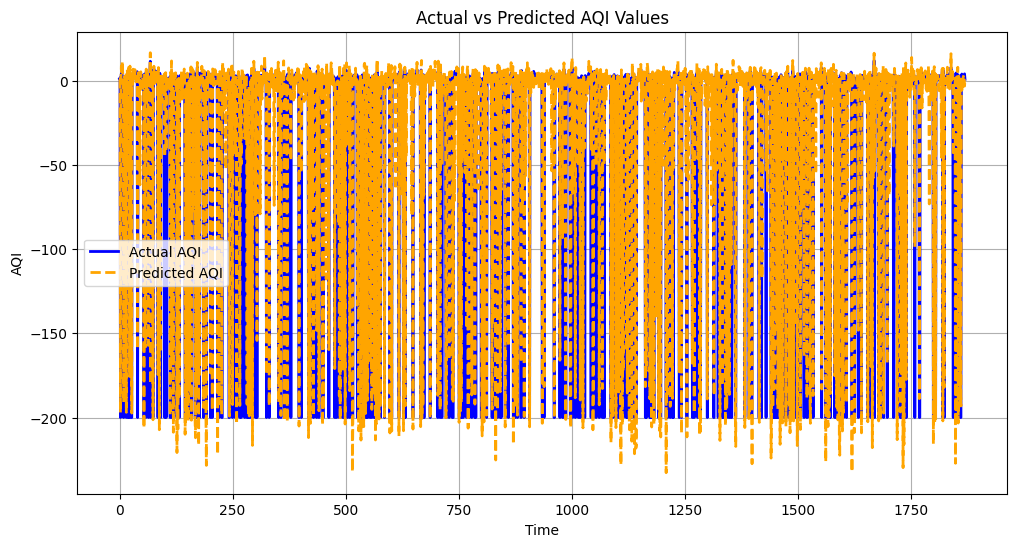

In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),  # input_shape=(1, 19)
    Dense(1)
])
#Compiling the model.
model.compile(optimizer='adam', loss='mse')
#Training the model.
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)
#Making predictions.
predicted = model.predict(X_test_scaled).flatten()
#Visualization.
#Actual AQI values from the test set.
actual = y_test.values
#Plotting Actual vs Predicted AQI Values.
plt.figure(figsize=(12, 6))
#Line plot for actual AQI values.
plt.plot(actual, label='Actual AQI', color='blue', linewidth=2)
#Dashed line for predicted values.
plt.plot(predicted, label='Predicted AQI', color='orange', linestyle='--', linewidth=2)
#Setting the plot title.
plt.title('Actual vs Predicted AQI Values')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
#Enabling grid for better visualization.
plt.grid(True)
plt.show()

##### **Step 05:** Summary of model performance

In [ ]:
#Calculating Mean Absolute Error (MAE).
mae = mean_absolute_error(actual, predicted)
#Calculating Mean Squared Error (MSE).
mse = mean_squared_error(actual, predicted)
#Calculating Root Mean Squared Error (RMSE).
rmse = np.sqrt(mse)
#Printing the performance metrics.
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 11.5062
Mean Squared Error (MSE): 913.3219
Root Mean Squared Error (RMSE): 30.2212


##### Conclusion
The model's performance in predicting AQI was evaluated using key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). The MAE of 11.53 indicates a moderate average deviation from the actual AQI values, while the MSE of 918.76 and RMSE of 30.31 suggest significant errors in prediction, especially for larger deviations. Despite these errors, the model demonstrates the potential to predict AQI trends. However, improvements in model architecture, feature selection or hyperparameter tuning could help enhance accuracy.

***